                                        Column           Q1   Median(Q2)  \
0                           age_of_the_patient    26.000000    47.000000   
1                        blood_pressure_mm_hg_   105.000000   131.000000   
2                    specific_gravity_of_urine     1.010000     1.015000   
3                             albumin_in_urine     1.000000     3.000000   
4                               sugar_in_urine     1.000000     2.000000   
5            random_blood_glucose_level_mg_dl_   176.000000   284.500000   
6                            blood_urea_mg_dl_    55.864665   104.401355   
7                      serum_creatinine_mg_dl_     4.200000     7.780000   
8                          sodium_level_meq_l_   127.563468   135.044974   
9                       potassium_level_meq_l_     4.229885     4.990991   
10                       hemoglobin_level_gms_     9.000000    11.900000   
11                         packed_cell_volume_    28.000000    38.000000   
12          

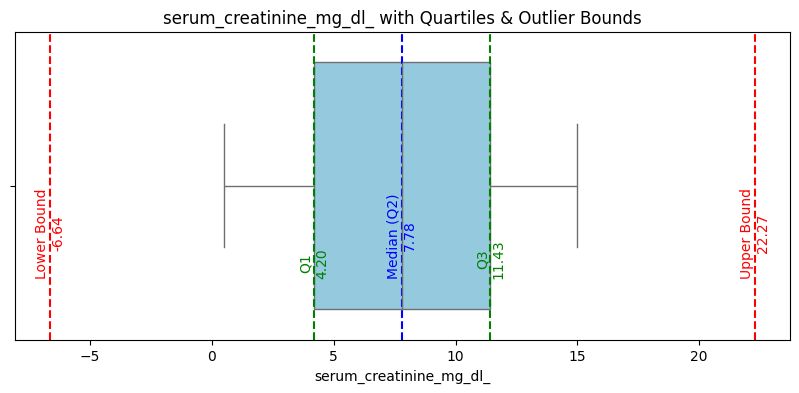

,age_of_the_patient,blood_pressure_mm_hg_,specific_gravity_of_urine,albumin_in_urine,sugar_in_urine,random_blood_glucose_level_mg_dl_,blood_urea_mg_dl_,serum_creatinine_mg_dl_,sodium_level_meq_l_,potassium_level_meq_l_,...,pus_cells_in_urine,pus_cell_clumps_in_urine,bacteria_in_urine,hypertension_yes_no_,diabetes_mellitus_yes_no_,coronary_artery_disease_yes_no_,anemia_yes_no_,family_history_of_chronic_kidney_disease,urinary_sediment_microscopy_results,target
0,54,167,1.023,1,4,96,169.101369,7.55,146.068410,6.272576,...,abnormal,not present,not present,yes,yes,no,no,no,normal,No_Disease
1,42,127,1.023,3,2,73,183.223479,13.37,123.501427,5.611303,...,normal,not present,present,no,yes,no,yes,yes,abnormal,Low_Risk
2,38,148,1.016,0,0,77,193.141665,9.49,149.456527,3.965957,...,normal,not present,not present,no,no,yes,no,no,abnormal,No_Disease
3,7,98,1.017,4,0,225,125.939396,10.98,131.758843,4.980997,...,normal,not present,present,no,no,yes,yes,no,abnormal,No_Disease
4,67,174,1.015,1,1,376,197.188600,3.01,120.912465,4.097602,...,abnormal,not present,not present,no,no,no,yes,no,normal,No_Disease
5,14,92,1.006,4,2,371,132.802723,13.98,132.584281,3.835989,...,abnormal,not present,present,yes,no,no,yes,no,normal,No_Disease
6,9,156,1.010,2,0,255,186.928101,4.54,137.973337,4.420588,...,normal,not present,not present,yes,no,no,yes,no,abnormal,No_Disease
7,67,100,1.010,5,3,260,27.308196,8.73,120.531186,4.794412,...,normal,present,present,no,no,yes,yes,yes,abnormal,No_Disease
8,42,138,1.017,4,4,352,169.656648,6.92,138.009505,5.103625,...,normal,present,present,yes,no,no,yes,no,abnormal,No_Disease
9,23,127,1.020,2,4,196,37.503679,5.25,149.675547,5.460159,...,abnormal,not present,present,yes,no,no,no,yes,abnormal,No_Disease


In [6]:
#== Member C: Outliner Handling ==

import pandas as pd, seaborn as sns, matplotlib.pyplot as plt

# Setup
df = pd.read_csv("C:\\Users\\TUF\\OneDrive\\Desktop\\SLIIT 2Y1S\\AI and ML\\Project\\AIML_Project\\kidney_disease_dataset(S).csv")
df.columns = df.columns.str.strip().str.lower().str.replace(r'[^\w]+', '_', regex=True)

useful_cols = [
    'age_of_the_patient','blood_pressure_mm_hg_','specific_gravity_of_urine','albumin_in_urine',
    'sugar_in_urine','random_blood_glucose_level_mg_dl_','blood_urea_mg_dl_','serum_creatinine_mg_dl_',
    'sodium_level_meq_l_','potassium_level_meq_l_','hemoglobin_level_gms_','packed_cell_volume_',
    'white_blood_cell_count_cells_cumm_','red_blood_cell_count_millions_cumm_',
    'estimated_glomerular_filtration_rate_egfr_','urine_protein_to_creatinine_ratio','urine_output_ml_day_',
    'serum_albumin_level','cholesterol_level','parathyroid_hormone_pth_level','serum_calcium_level',
    'serum_phosphate_level','body_mass_index_bmi_','cystatin_c_level','c_reactive_protein_crp_level',
    'interleukin_6_il_6_level','red_blood_cells_in_urine','pus_cells_in_urine','pus_cell_clumps_in_urine',
    'bacteria_in_urine','hypertension_yes_no_','diabetes_mellitus_yes_no_','coronary_artery_disease_yes_no_',
    'anemia_yes_no_','family_history_of_chronic_kidney_disease','urinary_sediment_microscopy_results','target'
]
df = df[useful_cols]

num_cols = df.select_dtypes(include=['float64','int64']).columns

# Store summary for all numeric columns
summary = []

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q2 = df[col].quantile(0.50)   # Median
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Clip values
    df[col] = df[col].clip(lower_bound, upper_bound)
    
    # Save summary
    summary.append([col, Q1, Q2, Q3, lower_bound, upper_bound])

# Convert to DataFrame for easy viewing
summary_df = pd.DataFrame(summary, columns=["Column","Q1","Median(Q2)","Q3","Lower Bound","Upper Bound"])
print(summary_df)

print("\nOutliers handled. Shape:", df.shape)

# === Visualization Example ===
col = "serum_creatinine_mg_dl_"   # pick one column to visualize

# Extract values for visualization
Q1 = summary_df.loc[summary_df["Column"]==col, "Q1"].values[0]
Q2 = summary_df.loc[summary_df["Column"]==col, "Median(Q2)"].values[0]
Q3 = summary_df.loc[summary_df["Column"]==col, "Q3"].values[0]
lower_bound = summary_df.loc[summary_df["Column"]==col, "Lower Bound"].values[0]
upper_bound = summary_df.loc[summary_df["Column"]==col, "Upper Bound"].values[0]

plt.figure(figsize=(10,4))
sns.boxplot(x=df[col], color="skyblue")

# Add vertical lines + labels
for val, label, color in [
    (Q1, "Q1", "green"),
    (Q2, "Median (Q2)", "blue"),
    (Q3, "Q3", "green"),
    (lower_bound, "Lower Bound", "red"),
    (upper_bound, "Upper Bound", "red")
]:
    plt.axvline(val, color=color, linestyle="--", linewidth=1.5)
    # Place label slightly above the boxplot line (y=0.3 ensures visibility)
    plt.text(val, 0.3, f"{label}\n{val:.2f}", rotation=90,
             verticalalignment="bottom", horizontalalignment="center", color=color)

plt.title(f"{col} with Quartiles & Outlier Bounds")
plt.show()
# Show first 10 rows
df.head(10)